# CSCI 3352 Biological Networks, Spring 2023, Prof. Clauset
Submit here: https://canvas.colorado.edu/courses/91192

# Problem Set 1 : Fundamentals of Networks

***

**Name**: ANNA HIRSCHMANN

**COLLABORATORS/SOURCES:** To complete this assignment, I discussed the problems with Carol Chang and Julia Bao. I also utilized online networkx documentation and lecture notes from class.

***

This assignment is due on Canvas by **11:55pm on Friday, January 27**. Your solutions to non-programming questions should be done in Markdown directly below the associated question. Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own** (see syllabus for detailed guidance). There are 88 points total, and 15 pts extra credit.

**NOTES**: 

- Unless a url is given for a data set, you will find the required data on the course Canvas.
- If you're not familiar with typesetting math directly in Markdown, you may do your work on paper first and then typeset it later. This [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) provides helpful guidance for writing math in Markdown. 
- It is **unhelpful** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.

***
* networkx [Documentation](https://networkx.github.io/documentation/stable/) and [Tutorial](https://networkx.github.io/documentation/stable/tutorial.html)
* igraph [Documentation](https://igraph.org/python/versions/latest/install.html) and [Tutorial](https://igraph.org/python/tutorial/0.9.8/tutorial.html)

[//]: <> (Documentation for igraph Python https://igraph.org/python/ )

In [1]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline

***
## Problem 1 : Network warmup (33 pts total)

This problem gives you with practice performing basic operations on network data, using the `networkx` library. In order to answer these questions, you will need to search through the `networkx` online documentation to find appropriate functions. Some solutions will require you to write a little bit of your own code to process the input or output of those functions.

***
### Problem 1-A (5 pts)

Using `networkx`, load the assigned network data file as a simple graph, and then report the following:
* number of nodes $n$
* number of edges $m$
* mean degree $\langle k \rangle$

There are 3 network files provided. Enter your birthday in the format MMYY (drop a leading 0) as `seed` and then work with the file the code snippet below tells you is yours.

In [25]:
import random
seed = 801 # your MMYY birthday here

##### do not modify below here #####
random.seed(seed)
roll_the_dice = random.randint(1, 3)
if roll_the_dice == 1:
    print(f'Lucky you! Your file is karate.gml')
elif roll_the_dice == 2:
    print(f'Fantastic! Your file is grass_web.gml')
else:
    print(f'Exciting! Your file is yeast_spliceosome.gml')
##### do not modify above here #####

Lucky you! Your file is karate.gml


In [26]:
karate_graph = nx.read_gml('karate.gml', label='id')
n = karate_graph.number_of_nodes()
m = karate_graph.number_of_edges()

kmean = 2*m / n

##### do not modify below here #####
print(f'number of nodes, n  = {n}')
print(f'number of edges, m  = {m}')
print(f'mean degree,    <k> = %5.2f' % kmean)

number of nodes, n  = 34
number of edges, m  = 78
mean degree,    <k> =  4.59


Summary of statistics:
* The number of nodes n indicates that there are 34 entities in this network. 
* The number of edges m indicates that there are 78 unique pairwise connections between entities in the network. 
* The mean degree 4.59 means that, on average, each node is connected to 4.59 others via a pairwise interaction.

***
### Problem 1-B (6 pts)

Use the drawing functions in `networkx` to visualize your network in 3 ways:
* `spring` layout
* `circular` layout
* `random` layout

Use the function `plt.show()` to show the layout itself, once you've built it using `networkx`.

Then, write a few sentences comparing the layouts. Briefly explain what, if anything, does each show well or not well.

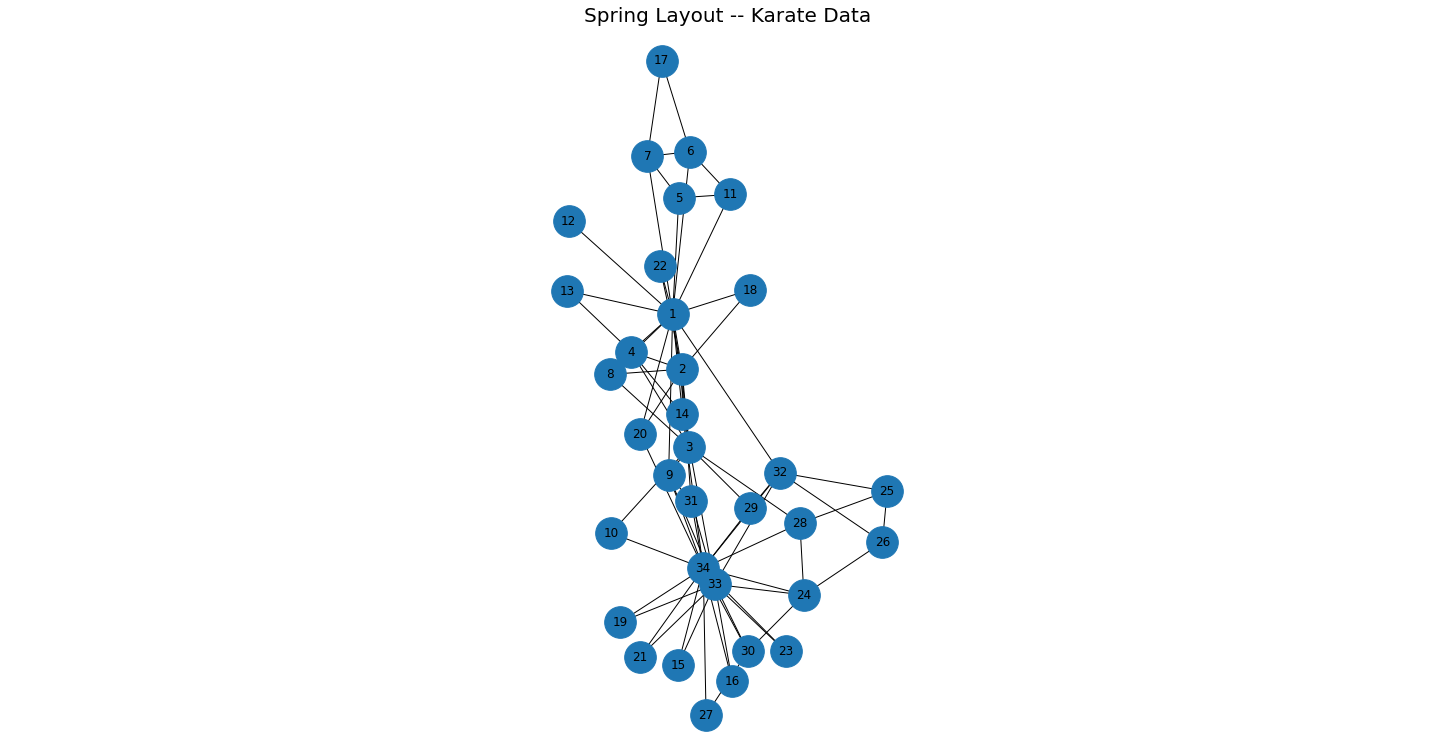

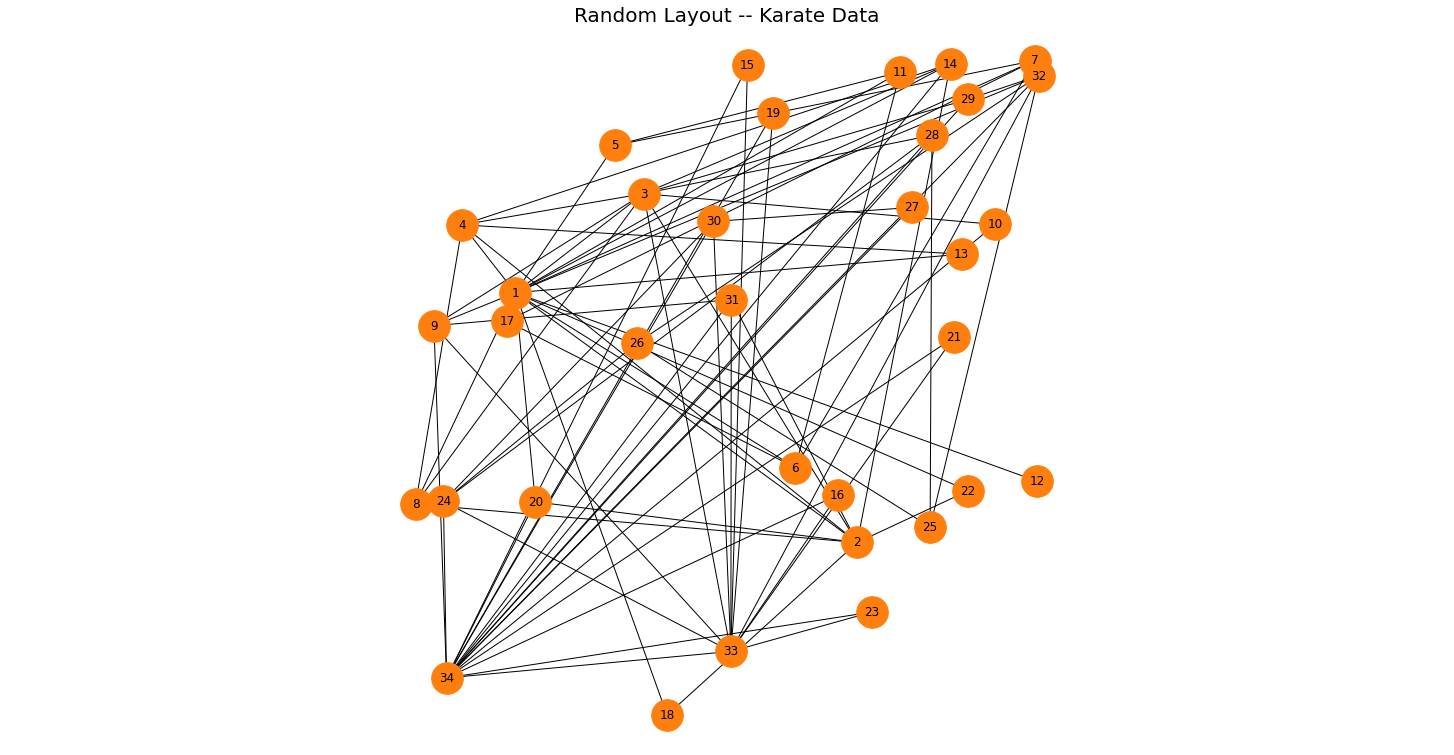

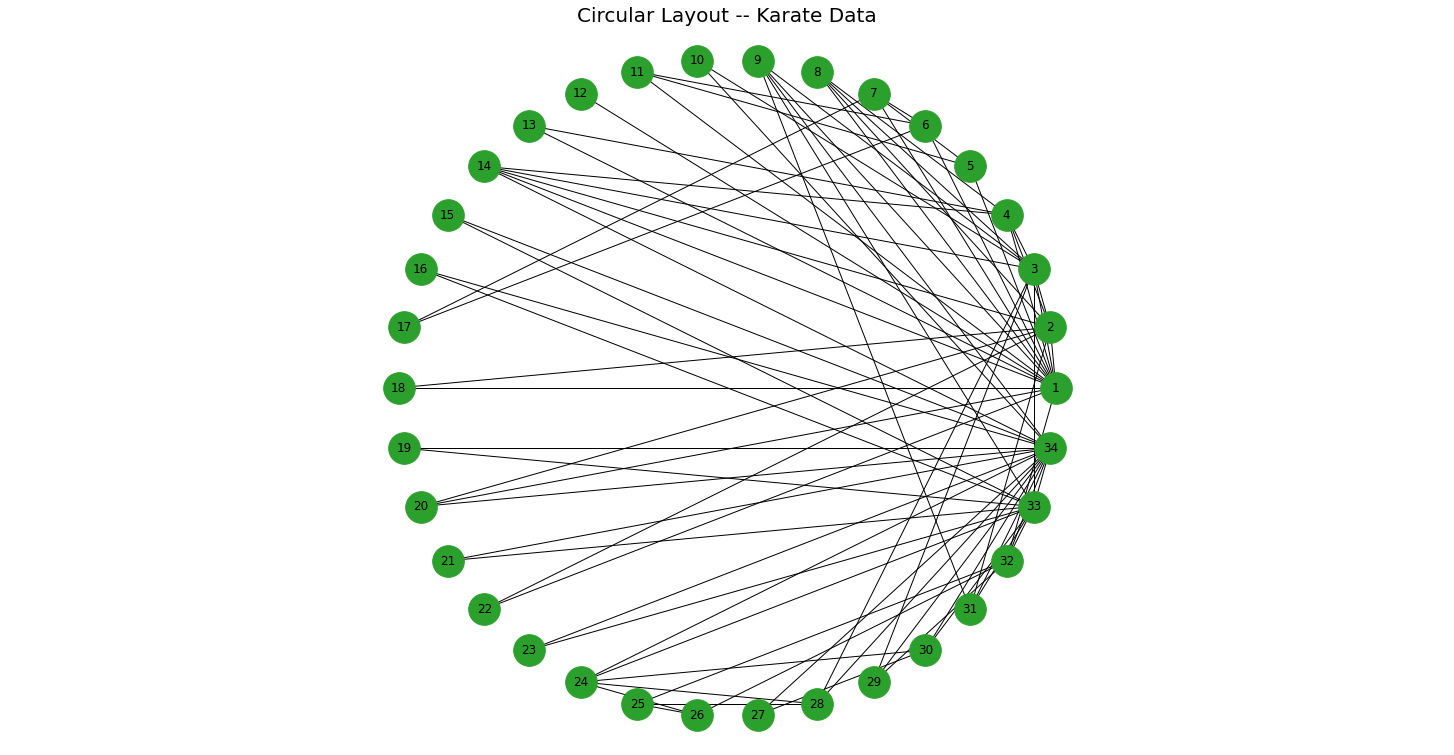

In [59]:
# SPRING
plt.figure(figsize=(20, 10))
nx.draw_spring(karate_graph, with_labels = True, node_color = 'C0', node_size=1000) # uses built in functions in networkx to plot the spring layout
plt.title("Spring Layout -- Karate Data", fontsize=20)
plt.axis('equal')
plt.show()

# RANDOM
plt.figure(figsize=(20, 10))
nx.draw_random(karate_graph, with_labels = True, node_color='C1', node_size=1000) # uses built in functions in networkx to plot the random layout
plt.title("Random Layout -- Karate Data", fontsize=20)
plt.axis('equal')
plt.show()

# CIRCULAR
plt.figure(figsize=(20, 10))
nx.draw_circular(karate_graph, with_labels = True, node_color='C2', node_size=1000) # uses built in functions in networkx to plot the circular layout
plt.title("Circular Layout -- Karate Data", fontsize=20)
plt.axis('equal')
plt.show()

* The **spring layout** ... arranges the nodes in such a way that the graph avoids intersecting edges. In this visualization, the proximity of the nodes in the middle makes it difficult to interpret the existence of certain edges. A possible weakness of this model is if one was trying to visualize a system that required a specific coordinate layout (for example, disease spreading) because the algorithms that place the nodes may not arrange them in ways that correspond to their actual positions in the system.


* The **random layout** ... arranges the nodes randomly within the graph, and plots relevant edges from there. This layout is difficult to interpret in general because some of the nodes are overlapping on the plot, so it is very difficult to get any information at all from this graph. The edges are difficult to trace through the plot, so it is difficult to tell which nodes are connected.


* The **circular layout** ... arranges the nodes in a circular layout so they are spaced evenly on an ellipse. In this layout, all of the edges pass through the center of the circle, so it is easy to visualize which nodes have more connections. One of the difficult things to see/interpret is when adjacent nodes on the ellipse share an edge, because they are much closer together than any of the nodes across the circle. In a network with a lot of edges, this would be a poor choice for a layout because it would become very difficult to make out the different edges in the middle of the circle.

***
### Problem 1-C (14 pts)

Using `networkx` functions, and any additional code you need to write, calculate and report the following network summary statistics:
* diameter $\ell_\max$
* mean geodesic path length $\langle \ell \rangle$
* clustering coefficient $C$ (aka, transitivity)
* number of connected components $h$
* maximum degree $k_{\rm max}$
* standard deviation of the degrees $\sigma_{k}$

Hint: the first four of these can be calculated using built-in functions from `networkx`; for the last two, you'll need to use the `.degrees(G)` function to obtain a dictionary of the degrees, and the process it yourself.

In [63]:
# calculate the diameter
diameter = nx.diameter(karate_graph)

# calculate the mean geodesic path length
ellmean = nx.average_shortest_path_length(karate_graph)

# calculate the clustering coefficient
C = nx.transitivity(karate_graph)

# calculate the number of connected components
h = nx.number_connected_components(karate_graph)

# get a list of node degrees
node_degrees = nx.degree(karate_graph) # NOTE: This is a DegreeView data type, which does not have the same attributes as a dictionary
degree_vals = [deg for (node_id, deg) in node_degrees] # pulls out a list of degree values

# identify the maximum degree
kmax = max(degree_vals) # extract the maximum degree value from the list

# calculate the standard deviation of the degrees
kstd = np.std(degree_vals)

##### do not modify below here #####
print(f'diameter = {diameter}')
print(f'mean geodesic distance, <ell> = %5.2f' % ellmean)
print(f'clustering coefficient, C     = %5.2f' % C)
print(f'number of components,   h     =  {h}')
print(f'max degree, k_max = {kmax}')
print(f'max degree, k_std = %5.2f' % kstd)

diameter = 5
mean geodesic distance, <ell> =  2.41
clustering coefficient, C     =  0.26
number of components,   h     =  1
max degree, k_max = 17
max degree, k_std =  3.82


Summary of statistics:
* Diameter refers to the longest shortest path length. So, a diameter of 5 indicates that a path between any two nodes in the network is a maximum of 5 edges long. 
* Mean geodesic distance is the average length of the shortest path between any two nodes. On average, a path between two nodes is 2.41 edges long. 
* The clustering coefficient is a measure of the proportion of triads that form triangles. The clustering coefficient of 0.26 indicates that of the instances of possible triangles, only about a quarter of them are actually triangles. 
* Because the number of components is 1, we know that there is a path between any two nodes in the network. 
* A maximum degree of 17 indicates that there is at least one node connected to 17 others, and no nodes are connected to more than 17 others. 
* Finally, a degree standard devation of 3.82 indicates that there is a lot of variance in the degree of the nodes in this network. 


***
### Problem 1-D (8 pts)

Using the provided functions, make **four** plots of the degree distribution:
* a `bar` plot of the probability density function (PDF; aka, a simple histogram), showing $\Pr(k)$ vs. $k$
* a `semilogx` plot of the PDF, showing $\Pr(k)$ vs. $\log_{10} k$
* a `loglog` plot of the PDF, showing $\log_{10} \Pr(k)$ vs. $\log_{10} k$
* a `loglog` plot of the complementary cumulative distribution function (CCDF), showing $\log_{10} \Pr(K\geq k)$ vs. $\log_{10} k$

Then comment briefly on the aspects of the degree distribution's shape that each plot over- or under-emphasizes, or shows clearly.

In [97]:
# I modified this code to update the figure sizes of the outputs, add titles, and adjust the fontsize of the axes labels

def plot_PDFhist(kis):
    # input : a list of degrees, e.g., from a networkx graph G
    # output: a plot of the PDF of the degree distribution Pr(k) as a simple histogram for k>=1
    
    kmax = max(kis)
    plt.figure(figsize = (10, 7))

    # histogram and plot
    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    plt.bar(bins[1:-1], counts[1:], facecolor='r', alpha=0.5)  
    plt.title("Histogram of the Probability Density\n of the Degree Distribution", fontsize= 18)
    plt.xlabel('Degree, k', fontsize=14)
    plt.ylabel('Pr(k)', fontsize=14)
    plt.show()
    return

def plot_PDFsemi(kis):
    # input : a list of degrees, e.g., from a networkx graph G
    # output: a plot of the PDF of the degree distribution Pr(k) on semi-log axes for k>=1
    
    kmax = max(kis)
    plt.figure(figsize = (10, 7))

    # histogram and plot
    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    plt.semilogx(bins[1:-1], counts[1:], 'rs-', alpha=0.5)
    plt.title("Semilog Plot of the Probability Density\n of the Degree Distribution", fontsize=18)
    plt.xlabel('Degree, k', fontsize=14)
    plt.ylabel('Pr(k)', fontsize = 14)
    plt.show()
    return

def plot_PDFloglog(kis):
    # input : a list of degrees, e.g., from a networkx graph G
    # output: a plot of the PDF of the degree distribution Pr(k) on log-log axes for k>=1
    
    kmax = max(kis)
    plt.figure(figsize = (10, 7))

    # histogram and plot
    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    plt.loglog(bins[1:-1], counts[1:], 'rs', alpha=0.5)
    plt.title("LogLog Plot of the Probability Density\n of the Degree Distribution", fontsize=18)
    plt.xlabel('Degree, k', fontsize=14)
    plt.ylabel('Pr(k)', fontsize=14)
    plt.show()
    return

def plot_CCDF(kis):
    # input : a list of degrees, e.g., from a networkx graph G
    # output: a plot of the CCDF of the degree distribution Pr(K>=k) for k>=1
    
    kmax = max(kis)
    plt.figure(figsize = (10, 7))

    # histogram and plot
    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    cumcounts = np.cumsum(counts)
    cumcounts = np.insert(cumcounts,0,0)
    plt.loglog(bins[1:-1], 1-cumcounts[1:-1], 'rs', alpha=0.5)
    plt.title("Complementary Cumulative Distribution Function\n Graph Node Degrees", fontsize=18)
    plt.xlabel('Degree, k', fontsize=14)
    plt.ylabel('Pr(K>=k)', fontsize=14)
    plt.show()
    return

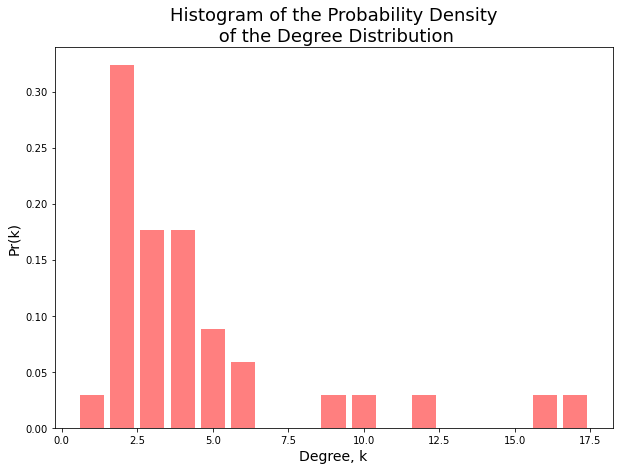

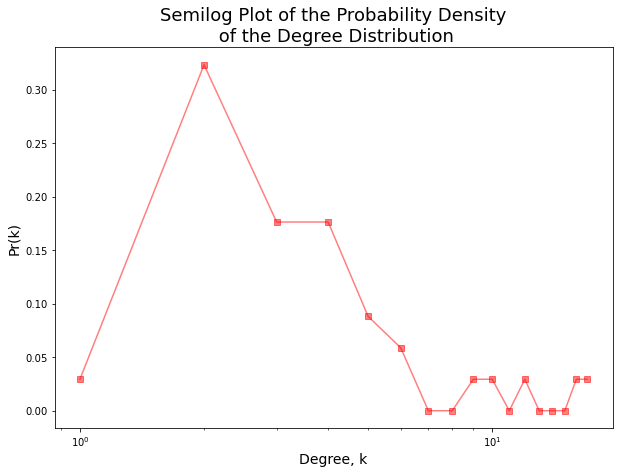

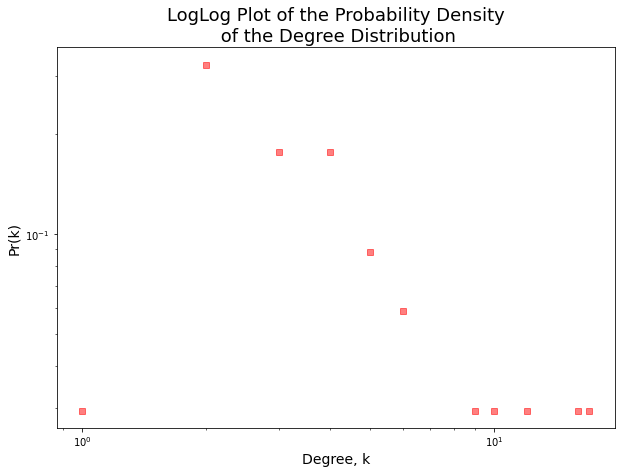

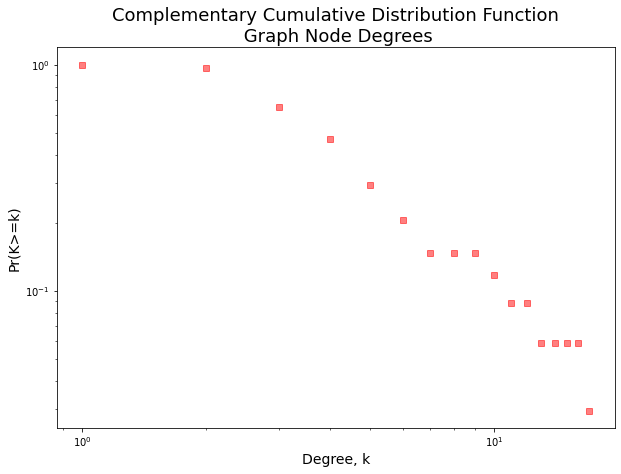

In [98]:
# Your code here

plot_PDFhist(degree_vals)

plot_PDFsemi(degree_vals)

plot_PDFloglog(degree_vals)

ccdf = plot_CCDF(degree_vals)

The various plots of the degree distirbutions seen above are good at representing different information about the degree distributions of the karate network. Because in the above calculations we determined that the maximum degree of any node in this network was only 17 (and the network contains 34 nodes) the scale of this data set is small compared to the blog example we studied in lecture. Nonetheless, some properties of the distributions are:
* The **histogram** works well in this small-scale example to illustrate the probability that a node has a given degree by displaying the integer values of possible degrees as the bins along the x axis and plotting the proportion of nodes with that degree on the y axis. From this graph we can easily see that the mode of the degrees is 2 and the maximum degree is 17. Because the data set is relatively small, the large variance in degree is evident from this histogram, but the other ways of representing this data have merits as well. 
* The **semilog-x** plot does not demonstrate a lot of useful information. The y axis is on the same scale as the histogram, but the x-axis is on a log scale, which only serves to make the space between integer degree values uneven. This means that the lower degree values are over-emphasized by this graph (whereas higher values of k are closer together along the x-axis).
* The **log-log** plot is nice because it does not graph points for degree values that are unrepresented by this graph. This helps to visualize the actual data of this network more accurately by forgoing plotting y=0 points which means that at first glance one could make more accurate conclusions about the actual distribution of the data. 
* The **CCDF** is a good way to visualize this information because it indicates exactly what percentage of nodes have at least degree k. Simply pick a k along the x axis, and the y coordinate of the corresponding point on the CCDF curve indicates the proportion of nodes that have degree $\geq k$. This is useful because it facilitates more direct analysis and does not require interpretation like the other visualization methods. 

Overall, because the size of this network is manageable all of these visualizations are easy to read, but the CCDF gives the biggest 'bang for your buck' because it represents the most data directly.

***
***
## Problem 2 : Graph properties (30 pts total)

Read each of the following written descriptions of a network data set. Then list in Markdown all applicable _graph properties_ that network has, from the following list.
* directed or undirected
* weighted or unweighted or signed
* bipartite
* temporal
* multiplex
* multigraph
* metadata

***
### Problem 2-A (5 pts)
A network of genes and the $k$-mers they contain, for some fixed choice of $k$ (e.g., $k=3$). Nodes are either the DNA sequence of a full gene or the sequence of a particular $k$-mer, and each gene is connected to all the $k$-mers it contains.

**Answer**:

The graph properties of this network are: 
* **undirected**: this network is inherently undirected. k-mers are monomers that make up genes. So, if a k-mer and a gene are connected by an edge, it means that that k-mer is a piece of the gene. No other information would be relayed by an edge directionality, so it would be undirected. 
* **unweighted**: there is no information that indicates that would be relayed by an edge-weight in this system. 
* **bipartite**: nodes fit into one of two categories: genes or k-mers. Genes are only connected to k-mers, so the network is bipartite.

***
### Problem 2-B (5 pts)
A network of proteins and their pairwise interactions. Each node is a protein, and a pair of nodes $i,j$ are connected if protein $i$ binds to protein $j$ _in vivo_. Edges are annotated with the corresponding (real-valued) binding affinity, and nodes are annotated with their molecular weight.

**Answer**: 

The graph properties of this network are: 
* **undirected**: because the binding described by this situation is not a directed process, the edges that represent binding between two genes would be undirected.
* **weighted**: it is indicated that the edges are annotated with the binding affinity of two proteins, which would be represented as an edge-weight in a graph.
* **metadata**: the nodes contain aditional information about the genes that they represent (i.e. their molecular weight).

***
### Problem 2-C (5 pts)
A sequence of network snapshots representing the spread over time of a communicable disease (e.g., influenza) through a human population. Every snapshot contains the same set of nodes, and the $t$-th snapshot contains all the edges that occurred in the real-time interval of $[t,t+1)$. Nodes are people, and two people $i,j$ are connected in the $t$-th snapshot if $j$ was infected by $i$ within the interval $[t,t+1)$. Nodes are annotated by the person's age and sex.

**Answer**: 

The graph properties of this network are: 
* **directed**: the edges would point from person i to person j to indicate that i infected j. 
* **unweighted**: there is no data to be represented by an edge-weight here, either a transmission occured or it did not. 
* **temporal**: a series of different time steps are represented by this graph in order to indicate transmission over time, so the graph is temporal showing different "layers" of timed data. (NOTE: temporal is a special kind of multiplex).
* **metadata**: there is metadata annotating the nodes: each individuals age and sex. 

NOTE: if the temporal aspect of this network problem were removed, this graph could be a multigraph (consider cases of reinfection or reciprocal infection). However, in one timestep, it is not plausible that there would be multiple edges between two nodes (one person could not infect the same person twice and if the time-steps are chosen meaningfully the first person could not reasonably be re-infected by someone they infected themselves). 

***
### Problem 2-D (5 pts)
A gene regulatory network where nodes are genes, and an edge exists if gene $i$ regulates gene $j$, in two layers. Edges are annotated as being either an activation (layer 1) or an inhibition (layer 2) type of interaction. Genes are annotated by their [Gene Ontology](http://geneontology.org) (GO) functional class label.

**Answer**: 

The graph properties of this network are: 
* **directed**: the direction of an edge would indicate which gene is the regulator and which is the regulatee in these interactions (i.e. an edge would point from i to j if i acts on j).
* **unweighted**: there is no data that necessitates edge weights in this network and because the multiplex aspect indicates activation vs inhibition interations, I do not think that the edges need to be signed. If the network did not have two "layers," then signed edges would be a good way to indicate the type of regulatory interactiopn between two genes.
* **multiplex**: the graph is multiplex because two different "layers" of data are represented. 
* **multigraph**: in a situation where two genes regulate each other, there could be multiple edges between them indicating reciprocal interation.
* **metadata**: each gene is annotated with their GO functional class label, which is additional metadata.

NOTE: I am unsure if this graph would be a multigraph because I am not sure if the types of reciprocal relationships I described happen with genes. I do not think they happen with proteins which is why I did not indicate this confusion on the protein binding questions. I can imagine a situation, however, in which a promoter activates a gene but then that gene inhibits the promoter (in a pairwise feedback loop essentially).

***
### Problem 2-E (5 pts)
A network of proteins in a signaling pathway. Each node is a protein, and a pair of nodes $i,j$ are connected if $i$ binds to $j$. Edges are annotated with the effect of the binding, either activation or inhibition.

**Answer**: 

The graph properties of this network are: 
* **directed**: edge direction in this network would indicate which protein is affected by the binding (they would point to whichever protein is activated/inhibited).
* **signed**: signs would indicate if the effect of the binding is activation (+) or inhibition (-).

***
### Problem 2-F (5 pts)
A network of disease and gene associations, where nodes are either diseases or genes, and a disease $i$ and a gene $j$ are connected if $j$ is associated (in some way) with the incidence of $i$. Disease are annotated with various information about them, e.g., their name, treatment, symptoms list, etc., and genes are annotated with the DNA sequence.

**Answer**: 

The graph properties of this network are:
* **undirected**: the edges in this fnetwork do not need to be directed because the edge direction would not represent any information about this system.
* **unweighted**: the edges are binary, meaning they are either present or not. 
* **bipartite**: there are two types of nodes, diseases and genes, and diseases only connect to genes and vice versa. 
* **metadata**: the nodes are annotated with information (diseases: name, treatment, symptoms, other information and genes have their DNA sequence).

***
***

## Problem 3 : Calculations by hand (25 pts total)

For each of the following networks, calculate by hand:
* maximum degree $k_{\rm max}$
* minimum degree $k_{\rm min}$
* clustering coefficient $C$ (transitivity)
* diameter $\ell_\max$

Do not use software to do these calculations. Explain each calculation and show your work in Markdown in the corresponding box below.

Hint: If a specific network is given, you may give your answers as numbers. If a family of networks is given (e.g., one in which the number of nodes $n$ is not specified), your answers should be in terms of the variables that parameterize the network (e.g., $n$).

***
### Problem 3-A (5 pts)
Let $G$ be a fully connected simple network, aka, a complete graph, with $n$ nodes.

NOTE: For the following solutions I considered nontrivial networks, i.e. $n > 1$. In the case that $n =1$, there are no edges so all statistics are $0$. 

$k_{max} = \boxed{n - 1}$ because each node is connected to the remaining $n - 1$ nodes because the network is fully connected.

$k_{min} = \boxed{n - 1}$ because each node must have exactly $n - 1$ connections for the network to have the completeness property.

$C = \frac{\displaystyle \sum_{i = 1}^{n} \sum_{j = 1}^{n} \sum_{k = 1}^{n} A_{ij}A_{jk}A_{ki}}{\displaystyle \sum_{i = 1}^{n} \sum_{j = 1}^{n} \sum_{k \neq i}^{n} A_{ij}A_{jk}} = \displaystyle \frac{3 \cdot \textrm{number of triangles}}{\textrm{number of connected triples}} = \displaystyle \frac{3 \cdot \frac{1}{3} \cdot n \choose 3}{n \choose 3} = \boxed{1}$

All possible triangles exist in a fully connected simple network, so the number of triangles is $\frac{1}{3} n \choose 3$ (because $n \choose 3$ triple-counts each triangle, and the number of triads is $n \choose 3$. Regardless of $n$ for $n \geq 3$, $C = 1$ in a fully connected simple network. 

NOTE: for $n = 2$, $C = 0$ trivially because there are no possible triangles for a network that has less than $3$ nodes.

$\ell_{max} = \boxed{1}$. This is because each node is connected directly to every other node, so the shortest path between any two nodes is along that edge.

***
### Problem 3-B (10 pts)

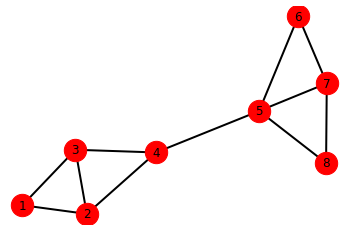

In [2]:
G = nx.Graph()          # empty graph data structure
# now, add a bunch of edges simultaneously
G.add_edges_from([(1,2), (1,3), (2,3), (2,4), (3,4), (4,5), (5,6), (5,7), (5,8), (6,7), (7,8)])
nx.draw_networkx(G,with_labels=True,node_size=500,node_color='r',width=2) # default: spring embed, with some options
limits=plt.axis('off')  # turn off the bounding box and axis labels
plt.show()              # show me the network!

Inspection of this graph leads to the following dictionary of node ids (keys) and their respective degrees (values): $\{1:2, 2:3, 3:3, 4:3, 5:4, 6:2, 7:3, 8:2\}$. So, from this we get the first two statistics:

$k_{max} = \boxed{4}$ (node $5$ has degree $4$).

$k_{min} = \boxed{2}$ (nodes $1$, $6$, and $8$ have degree $2$).

$C = \frac{\displaystyle \sum_{i = 1}^{n} \sum_{j = 1}^{n} \sum_{k = 1}^{n} A_{ij}A_{jk}A_{ki}}{\displaystyle \sum_{i = 1}^{n} \sum_{j = 1}^{n} \sum_{k \neq i}^{n} A_{ij}A_{jk}} = \displaystyle \frac{3 \cdot \textrm{number of triangles}}{\textrm{number of connected triples}} = \boxed{\frac{12}{21}}$ 

NOTE: I worked this out on my tablet by redrawing the system and a photo of my work is below.

In [8]:
dic = nx.all_pairs_shortest_path_length(G)
for key, val in dic:
    print(key, val)

1 {1: 0, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 4, 8: 4}
2 {2: 0, 1: 1, 3: 1, 4: 1, 5: 2, 6: 3, 7: 3, 8: 3}
3 {3: 0, 1: 1, 2: 1, 4: 1, 5: 2, 6: 3, 7: 3, 8: 3}
4 {4: 0, 2: 1, 3: 1, 5: 1, 1: 2, 6: 2, 7: 2, 8: 2}
5 {5: 0, 4: 1, 6: 1, 7: 1, 8: 1, 2: 2, 3: 2, 1: 3}
6 {6: 0, 5: 1, 7: 1, 4: 2, 8: 2, 2: 3, 3: 3, 1: 4}
7 {7: 0, 5: 1, 6: 1, 8: 1, 4: 2, 2: 3, 3: 3, 1: 4}
8 {8: 0, 5: 1, 7: 1, 4: 2, 6: 2, 2: 3, 3: 3, 1: 4}


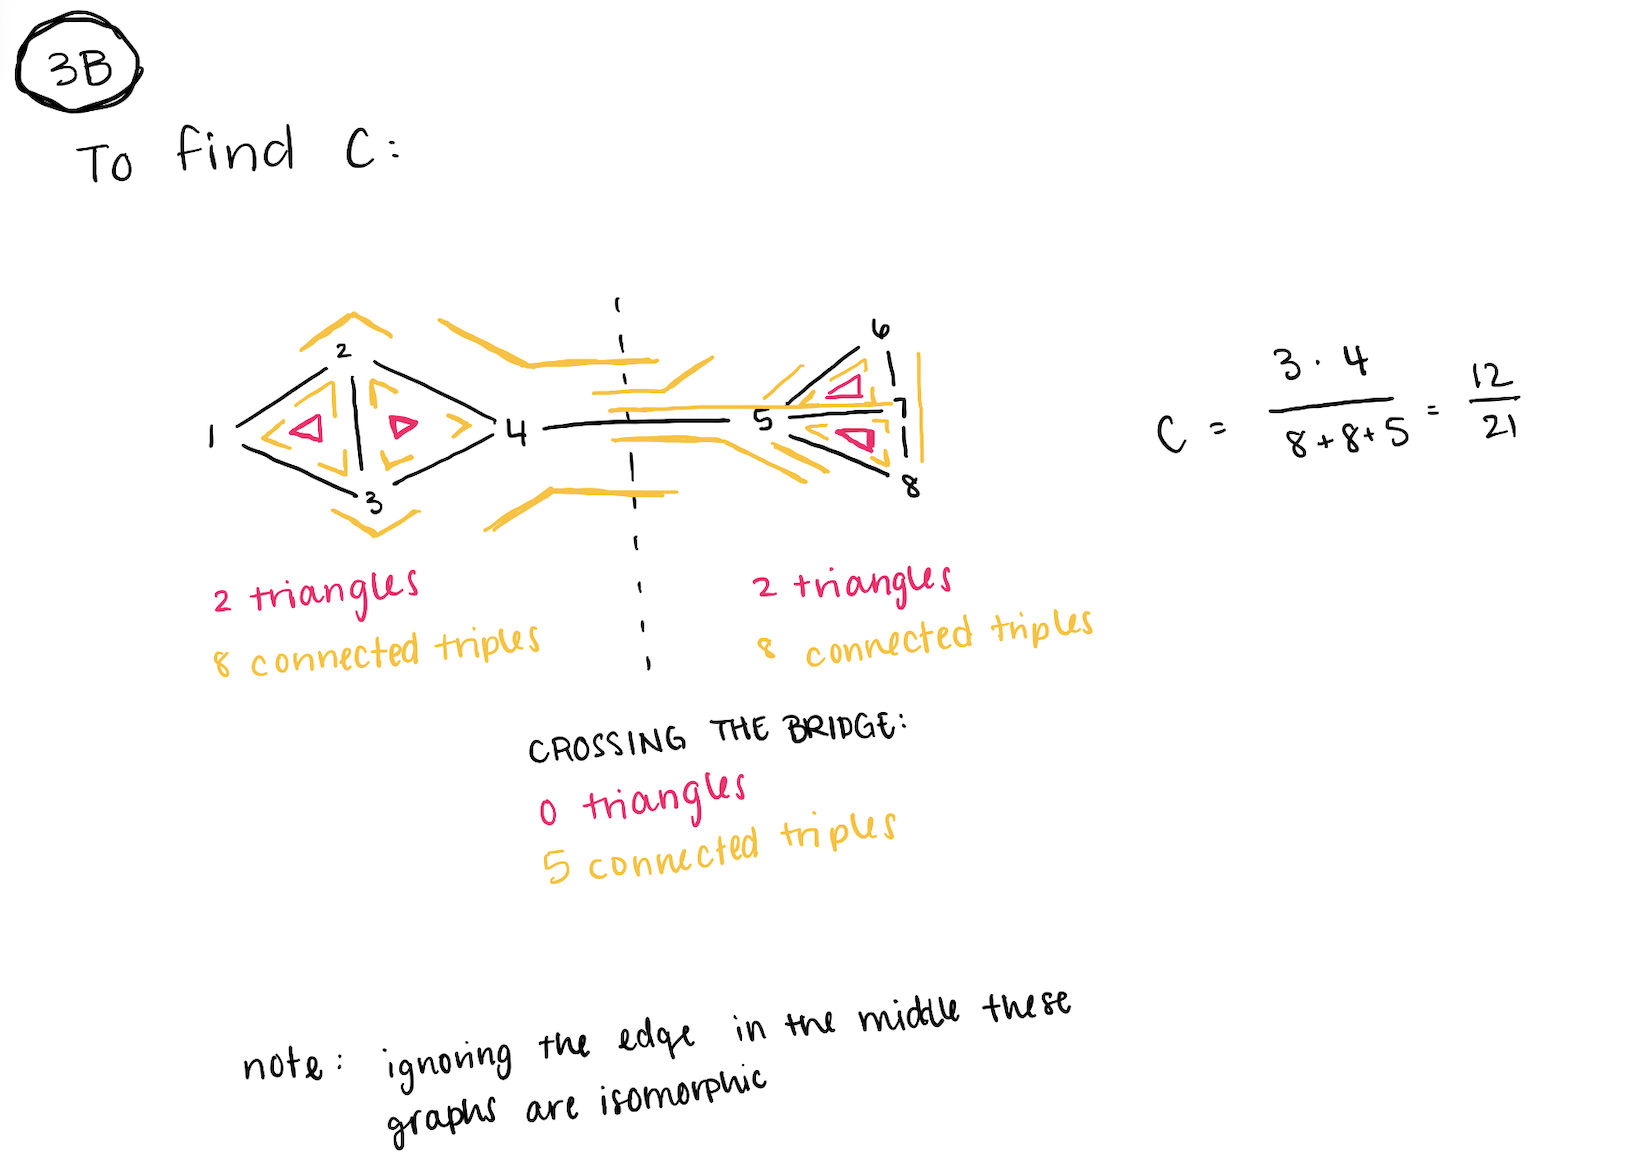

$\ell_{max} = \boxed{4}$. This is based on the observation that to get between nodes $1$ and $7$, for example, one would need to use $4$ edges (at minimum). One possible shortest path between these nodes is: $1 \rightarrow 2 \rightarrow 4 \rightarrow 5 \rightarrow 7$. I figured this out by relying on my intuition, because the "longest" shortest path, I reasoned, would have to go over the "bridge" from nodes 4 to 5, and so between the leftmost and rightmost nodes on this graph would take the longest path. 

***
### Problem 3-C (5 pts)
Let $G$ be a _perfect_ binary tree containing $n$ nodes. Hint: how many nodes $n$ does a perfect binary tree contain, for depth $d=0,1,2,\dots$

(*extra credit*) Calculate the mean degree $\langle k \rangle$.

For a complete perfect binary tree of depth $d$, there are $n = 2^d$ nodes on layer $d$ of the tree. Thus, there are a total of $n = \displaystyle \sum_{i = 0}^d 2^i$ nodes. If incomplete, this means some of the leaves are missing. Regardless, the number of nodes in the tree is greater than $n = \displaystyle \sum_{i = 0}^{d-1} 2^i$.

For a tree with depth $> 2$, the max degree possible would be a node that has a parent and two children (i.e. a node that is not a leaf or the root of the tree). In this case, $k_{max} = \boxed{3}$. This is also possible in a tree with depth $2$ that has all possible leaves or a large enough subset of the possible leaves that one of the nodes on the middle layer of the tree has two children.

In a tree with only one node, $k_{max} = k_{min} = \boxed{0}$. 

In a tree where no nodes have two children except the root, $k_{max} = \boxed{2}$.

In all trees with $n > 1$, $k_{min} = \boxed{1}$. All leaf nodes have degree $1$.

$C = \frac{\displaystyle \sum_{i = 1}^{n} \sum_{j = 1}^{n} \sum_{k = 1}^{n} A_{ij}A_{jk}A_{ki}}{\displaystyle \sum_{i = 1}^{n} \sum_{j = 1}^{n} \sum_{k \neq i}^{n} A_{ij}A_{jk}} = \boxed{0}$. By definition, a perfect binary tree would never contain triangles, so, in this case, $C$ is always $0$.

$\ell_{max} = \boxed{2 \cdot \log_{2}{n}}$. The longest shortest path would be between two leaves of the tree that do not share a parent (in a case where $n = 2^d $. In a perfect binary tree, all leaves are at the same depth of the tree and that depth, $d = \log_{2}{n}$ is the number of edges that one would need to traverse to get from the leaf to the root, and then you would again have to go on the order of $\log_{2}{n}$ edges to get to the target leaf.

**EXTRA CREDIT:**

Let's consider a complete perfect binary tree (i.e. each level of the tree has exactly $2^d$ nodes on it. The other cases have some complex nuances that require a lot of unnecessary calculations in the general case. 

In a complete perfect binary tree of depth $d = 0$ so $n = 1$, the average degree is $\boxed{\langle k \rangle = 0}$ because there cannot be any edges.

In a complete perfect binary tree of depth $d = 1$, so $n = 3$ (using the formula I outlined above) we know that one of these nodes is the root (thus has degree $2$) and the other two are leaves (each with degree $1$). So, we can directly calculate the average degree $\boxed{\langle k \rangle = \frac{4}{3}}$.

Now let's consider the case that $d > 1$. The degree of the root is always $2$, and the degree of the leaves is $1$, while degrees of nodes in the middle of the tree are $3$. So, $\boxed{\langle k \rangle = \frac{\displaystyle 2 + \left ( \sum_{i = 1}^{d-1} 3 \cdot 2^i \right ) + 2^d }{\displaystyle \sum_{i = 0}^d 2^i}}$ where the numerator is the sum of the degrees of the nodes and the denominator is the total number of nodes.

***
### Problem 3-D (5 pts)
Let $G$ be a simple "ring" network with $n$ nodes, in which nodes are arranged in a line, each one connecting only to its immediate neighbors to the left and right, except for the nodes at the beginning and end of the line, which connect to each other. Below is an example for $n=6$, but state your answers for the general case of $n>0$.

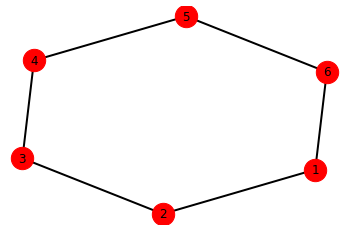

In [7]:
G = nx.Graph()          # empty graph data structure
G.add_edges_from([(1,2), (2,3), (3,4), (4,5), (5,6), (6,1)])
nx.draw_networkx(G,with_labels=True,node_size=500,node_color='r',width=2) # default: spring embed, with some options
limits=plt.axis('off')  # turn off the bounding box and axis labels
plt.show()              # show me the network!

$k_{max} = k_{min} = \boxed{0 \textrm{ for } n=1}$. This is trivial. In a simple network with $1$ node, there are no possible edges so both the minimum and maximum degree are $0$.

$k_{max} = k_{min} = \boxed{1 \textrm{ for } n=2}$. This is also pretty trivial. In the case that there are two nodes, there is one edge between them. So each of the nodes has degree $1$.

$k_{max} = k_{min} = \boxed{2 \textrm{ for } n>2}$. This is because the nodes are arranged in a ring and each node is connected to the two adjacent nodes. Thus, for any network with at least $3$ nodes, every node is connected to exactly $2$ others.

$\boxed{C = 0 \textrm{ for all } n >0, n \neq 3}$. Although every node in the network is the center of exactly $1$ connected triple (as long as there are at least three nodes) but there are no triangles, so $C$ must be $0$. When $\boxed{C = 1 \textrm{ for } n = 3}$, because there is $1$ triangle and there are $3$ connected triples. 

$\ell_{max} = \boxed{n//2 \textrm{ for all } n> 0}$. Using the definition of shortest path, the longest shortest path would occur when trying to get between node one of the network and the "middle-most" node of the network. In the case you have an even number of nodes, both directions would give the same path length and in the case of an odd number you round down and take the shortest direction. Regardless, the longest shortest path involves traversing $n // 2$ edges where $//$ denotes floor-division.

***
***

## Problem 4 : Reading the literature (*10pts extra credit*)

*This extra credit problem is meant to help you look for a project topic*

Choose a paper from the [Supplemental Reading list on the external course webpage](https://aaronclauset.github.io/courses/3352/). Read the paper (the whole paper, not just the abstract). Think about what it says and what it finds. Read it again, if it's not clear. Then, write 1-3 sentences for each of the following questions in a way that clearly summarizes the work, and its context.
* What was the research question?
* What was the approach the authors took to answer that question?
* What did they do well?
* What could they have done better?
* What extensions can you envision?


Do not copy any text from the paper itself; write your own summary, in your own words in Markdown in the corresponding box below. Be sure to answer each of the five questions. The amount of extra credit will depend on the accuracy and thoughtfulness of your answers.

* *What paper did you choose?*<br/>
Give the Authors, Title, Publication Venue, Year
<br/>


* *What was the research question?*<br/>
Your answer here
<br/>

* *What was the approach the authors took to answer that question?*<br/>
Your answer here
<br/>

* *What did they do well?*<br/>
Your answer here
<br/>

* *What could they have done better?*<br/>
Your answer here
<br/>

* *What extensions can you envision?*<br/>
Your answer here